Lets fixed $\Lambda = 3.5$

In [1]:
using IntervalArithmetic

In [2]:
Λ = Interval(3.5)

[3.5, 3.5]

In [3]:
α = Λ/(Λ-1)

[1.39999, 1.40001]

In [4]:
K = Int64(floor(mid(Λ)))

3

In [5]:
q_K_k(k) = max(0, 0.5*((Λ-1-k)/(Λ-1)))

q_K_k (generic function with 1 method)

In [6]:
F(k) = x -> x + α*(k-(k^2-(k/α)*(k+1-2*x))^(0.5))

F (generic function with 1 method)

Finding the branch intervals.

In [7]:
[q_K_k(i) for i in 1:K]

3-element Vector{Interval{Float64}}:
     [0.299999, 0.300001]
     [0.0999999, 0.100001]
 [0, 0]

In [9]:
using Plots

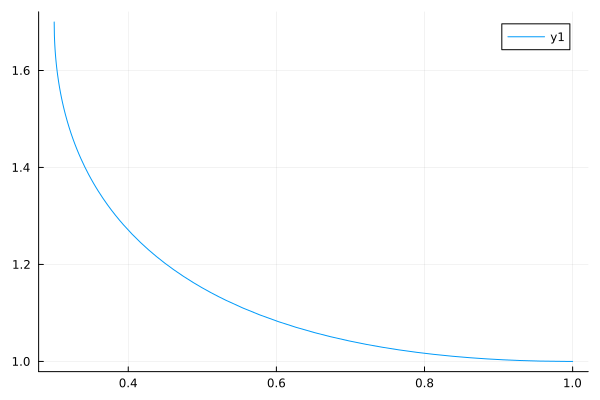

In [10]:
f1 = F(1)
plot(x->mid(f1(x),1), (1.5/5), 1)

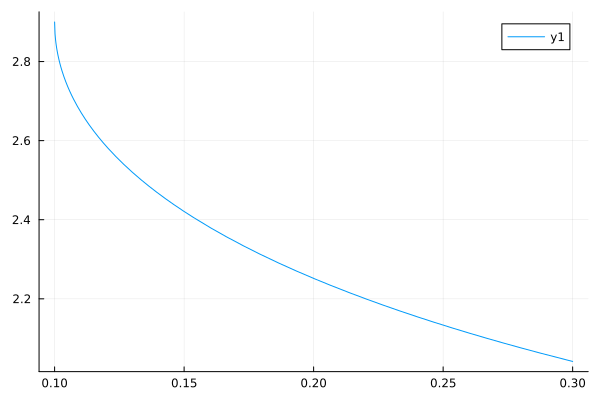

In [11]:
f2 = F(2)
plot(x->mid(f2(x),1), (0.5/5), (1.5/5))

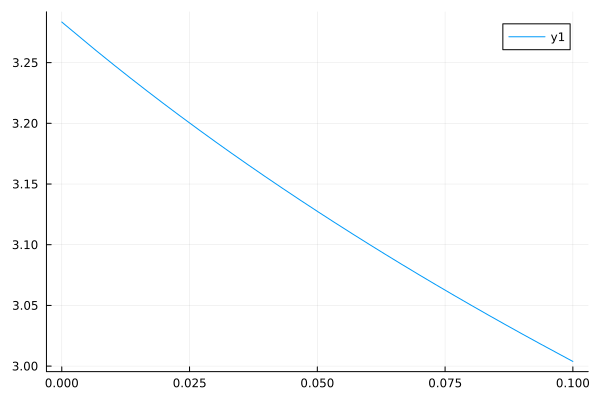

In [12]:
f3 = F(3)
plot(x->mid(f3(x),1), 0, (0.5/5))

In [13]:
using RigorousInvariantMeasures

In [14]:
D = PwMap([x->f3(x)-3.0;x->f2(x)-2.0; x->f1(x)-1.0], [Interval(0), Interval(0.5/5),Interval(1.5/5), Interval(1)])

Piecewise-defined dynamic with 3 branches

In [15]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [16]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/jSNyj/src/GenericAssembler.jl:102
Computing preimages... 100%|█████████████████████████████| Time: 0:00:10


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([287, 288, 289, 290, 291, 284, 285, 286, 287, 280  …  389, 390, 391, 392, 393, 394, 395, 396, 397, 398], [1, 1, 1, 1, 1, 2, 2, 2, 2, 3  …  1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024], Interval{Float64}[[0.0794511, 0.0794512], [0.280487, 0.280488], [0.28, 0.280001], [0.279512, 0.279513], [0.0805482, 0.0805483], [0.235054, 0.235055], [0.281954, 0.281955], [0.281465, 0.281466], [0.201525, 0.201526], [0.102327, 0.102328]  …  [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]], 1024, 1024))

In [17]:
Q.L

1024×1024 SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64} with 281832 stored entries:
⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⢠⠇⠀⠀⠀⠀⠀⠀⢀⡞⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⢀⡏⠀⠀⠀⠀⠀⠀⢀⡞⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⡼⠀⠀⠀⠀⠀⠀⢀⡞⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢰⠃⠀⠀⠀⠀⠀⠀⡼⠀⠀⠀⠉⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠏⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⢀⡏⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⣸⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⢀⡇⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⠀⣸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢠⠇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⣸⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [18]:
E = D ∘ D

RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 3 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 8 branches)

In [20]:
Q = DiscretizedOperator(B, E)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/jSNyj/src/GenericAssembler.jl:102
Computing preimages... 100%|█████████████████████████████| Time: 0:00:25


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([72, 73, 74, 75, 76, 77, 78, 78, 79, 80  …  913, 914, 915, 916, 917, 918, 919, 920, 921, 922], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2  …  1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024], Interval{Float64}[[0.0797547, 0.0797548], [0.158173, 0.158174], [0.157955, 0.157956], [0.157737, 0.157738], [0.157518, 0.157519], [0.1573, 0.157301], [0.131559, 0.13156], [0.0255224, 0.0255225], [0.156863, 0.156864], [0.156644, 0.156645]  …  [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]], 1024, 1024))

In [21]:
Q.L

1024×1024 SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64} with 693965 stored entries:
⠀⠀⢸⠀⣿⣿⣿⣇⠀⠀⠸⡄⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⡆⠀⠘⡆⣿⣿⣿⣿⠀⠀⠀⢧⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢳⠀⠀⡇⣿⣿⣿⡟⡆⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⠀⠀⢹⣿⣿⣿⡇⢧⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠈⡇⠀⢸⣿⣿⣿⡇⢸⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⡇⠀⠀⣿⣿⣿⡇⠘⡆⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⢳⠀⠀⣿⣿⣿⡇⠀⡇⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⢸⠀⠀⣿⣿⣿⠇⠀⢹⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⢸⠀⠀⠀⠀⠈⡇⠀⢸⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠈⡇⠀⠀⠀⠀⡇⠀⠘⡆⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⡇⠀⠀⠀⠀⡇⠀⠀⡇⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⡇⠀⠀⠀⠀⡇⠀⠀⡇⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⡇⠀⠀⠀⠀⡇⠀⠀⢧⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⡇⠀⠀⠀⠀⡇⠀⠀⢸⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⢸⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⢸⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⢸⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⢸⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀